In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.init as init

In [2]:
device = torch.device("cuda:0")

In [21]:
num_data = 1000
num_epoch = 100000

noise = init.normal_(torch.FloatTensor(num_data,1),std=1).to(device)
x = init.uniform_(torch.Tensor(num_data,1),-15,15).to(device)
y = (x**2) + 3
y_noise = y + 3*noise
y_noise = y_noise.to(device)

In [22]:
model = nn.Sequential(
    nn.Linear(1,6),
    nn.ReLU(),
    nn.Linear(6,10),
    nn.ReLU(),
    nn.Linear(10,6),
    nn.ReLU(),
    nn.Linear(6,1)
).to(device)
loss_func = nn.L1Loss().to(device)
# loss_func.cuda()
optimaizer = optim.SGD(model.parameters(), lr=0.0002)
# optimaizer.cuda()

In [23]:
loss_array = []
for i in range(num_epoch):
    optimaizer.zero_grad()
    output = model(x)
    loss = loss_func(output, y_noise)
    loss.backward()
    optimaizer.step()

    loss_array.append(loss.item())

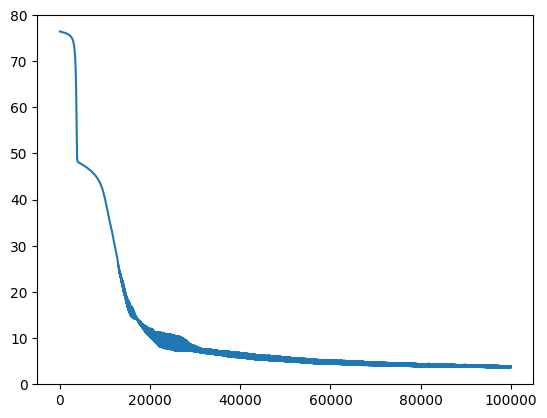

In [24]:
import matplotlib.pyplot as plt
plt.plot(loss_array)
plt.show()

In [25]:
import numpy as np
x_test = np.arange(-15, 15, 0.001)
x_test = torch.tensor(x_test).reshape(x_test.shape[0], 1).float()

y_test = model(x_test)


RuntimeError: Expected all tensors to be on the same device, but found at least two devices, cuda:0 and cpu! (when checking argument for argument mat1 in method wrapper_addmm)

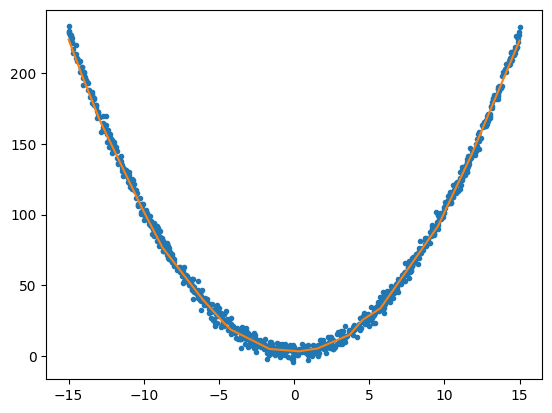

In [8]:
plt.plot(x, y_noise, '.')
plt.plot(x_test.detach().numpy(), y_test.detach().numpy())
plt.show()